# Predicción de CO2

## Aprendizaje Supervisado

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
!wget -O FuelConsumption.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv

--2023-02-25 19:14:01--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72629 (71K) [text/csv]
Saving to: ‘FuelConsumption.csv’

FuelConsumption.csv 100%[===================>]  70.93K  --.-KB/s    in 0.001s  

2023-02-25 19:14:01 (66.0 MB/s) - ‘FuelConsumption.csv’ saved [72629/72629]



MODELO e.g. 2014
MOTOR e.g. Acura
MODELO e.g. ILX
CLASE DE VEHICULO e.g. SUV
TAMAÑO DE LA MAQUINA e.g. 4.7
CILINDROS e.g 6
TRANSMISIÓN e.g. A6U
CONSUMO COMBUSTIBLE CITY(L/100 km) e.g. 9.9
CONDUMO COMBUSTIBLE HWY (L/100 km) e.g. 8.9
CONSUMO DE COMBUSTIBLE COMB (L/100 km) e.g. 9.2
CO2 EMISSIONS (g/km) e.g. 182 --> low --> 0

### PROCESAMIENTO DE DATOS

In [3]:
df = pd.read_csv("FuelConsumption.csv")

# Consultamos las primeras conco filas del DF
df.head(10)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
5,2014,ACURA,RLX,MID-SIZE,3.5,6,AS6,Z,11.9,7.7,10.0,28,230
6,2014,ACURA,TL,MID-SIZE,3.5,6,AS6,Z,11.8,8.1,10.1,28,232
7,2014,ACURA,TL AWD,MID-SIZE,3.7,6,AS6,Z,12.8,9.0,11.1,25,255
8,2014,ACURA,TL AWD,MID-SIZE,3.7,6,M6,Z,13.4,9.5,11.6,24,267
9,2014,ACURA,TSX,COMPACT,2.4,4,AS5,Z,10.6,7.5,9.2,31,212


### Exploramos estadísticamente

In [4]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


Información de los tipos de datos y homegeniedad

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


Las 13 columnas tienes las mismas 1067 filas.

Dimensiones de la Data

In [6]:
df.shape

(1067, 13)

El DataFrames está compuesto por 1067 filas y 13 columnas.

Verificamos los datos nulos

In [7]:
df.isnull().sum()

MODELYEAR                   0
MAKE                        0
MODEL                       0
VEHICLECLASS                0
ENGINESIZE                  0
CYLINDERS                   0
TRANSMISSION                0
FUELTYPE                    0
FUELCONSUMPTION_CITY        0
FUELCONSUMPTION_HWY         0
FUELCONSUMPTION_COMB        0
FUELCONSUMPTION_COMB_MPG    0
CO2EMISSIONS                0
dtype: int64

Correlación de Pearson

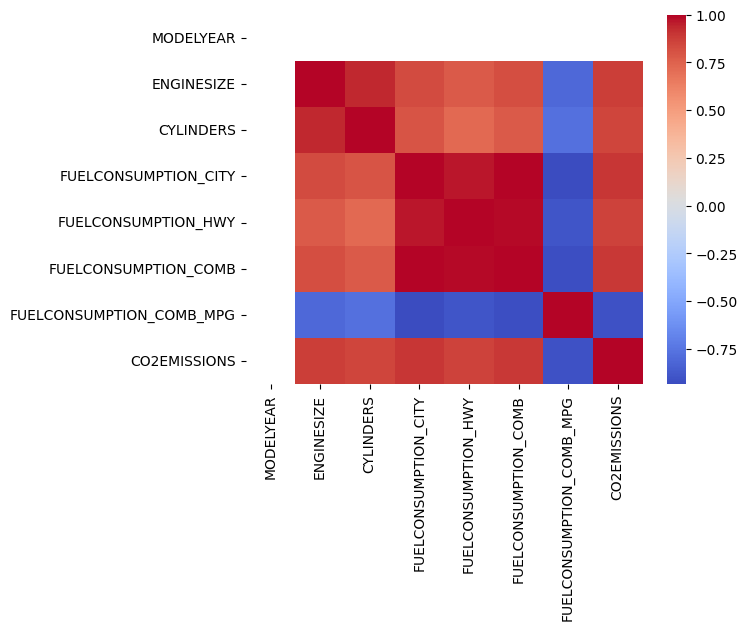

In [8]:
#Correlación de Perason, a traves de un mapa de calor
c= df.corr()
sns.heatmap(c, cmap= 'coolwarm')
plt.show()

Segementamos las carecteristicas para profundizar más en el analisis

Nos concentraremos en las variables que guaradan más correlación con la variables de CO2EMISSION

In [9]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267


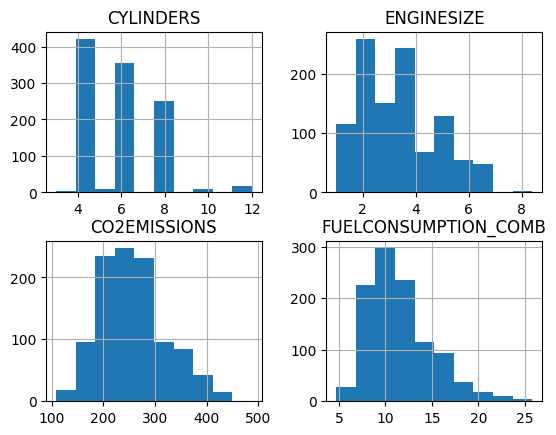

In [10]:
#Analizamos las frecuencias de las variables de interés
frec = cdf[['CYLINDERS','ENGINESIZE','CO2EMISSIONS','FUELCONSUMPTION_COMB']]
frec.hist()
plt.show()

CYLINDERS:  Existen 5 tipos de tamaños de cilindros en los autos; 4, 6, 8, 10 y 12 cilindros. Los más frecuentes son los de 4 cilindros.

ENGINESIZE: el tamaño de la maquina más frecuentes son de 2 y 4 tiempos.

CO2EMISSIONS: las emisiones de CO2 más frecuentes se encuentran ubicadas entre 200 y 300 g/km.

Diagramamos la dispersión de las variables Consumo combustible_COMB y Emisiones de CO2

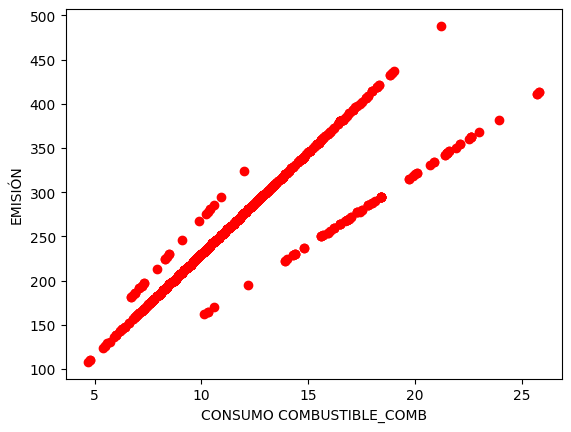

In [11]:
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS,  color='red')
plt.xlabel("CONSUMO COMBUSTIBLE_COMB")
plt.ylabel("EMISIÓN")
plt.show()

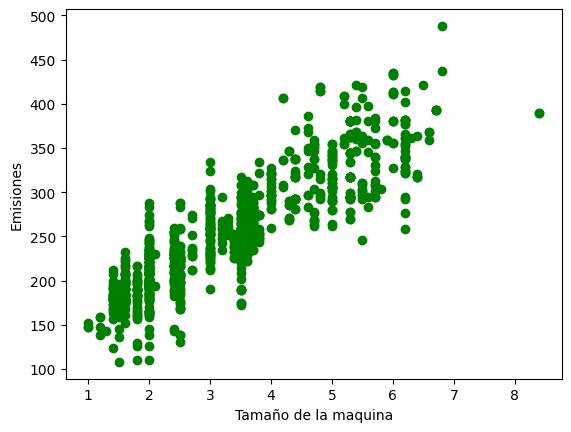

In [12]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='green')
plt.xlabel("Tamaño de la maquina")
plt.ylabel("Emisiones")
plt.show()

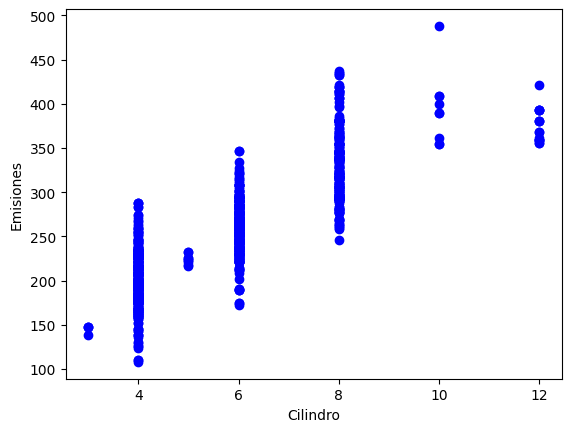

In [13]:
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS, color='blue')
plt.xlabel("Cilindro")
plt.ylabel("Emisiones")
plt.show()

## Regresión Lineal Simple

### ENTRENAMIENTO-PRUEBA

Dividamos nuestro conjunto de datos en conjuntos de entrenamiento y prueba. El 80 % de todo el conjunto de datos se utilizará para entrenamiento y el 20 % para pruebas. Creamos una máscara para seleccionar filas aleatorias usando la función np.random.rand():

In [14]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

### Modelo de Regresión Simple

Distribución del entrenamiento

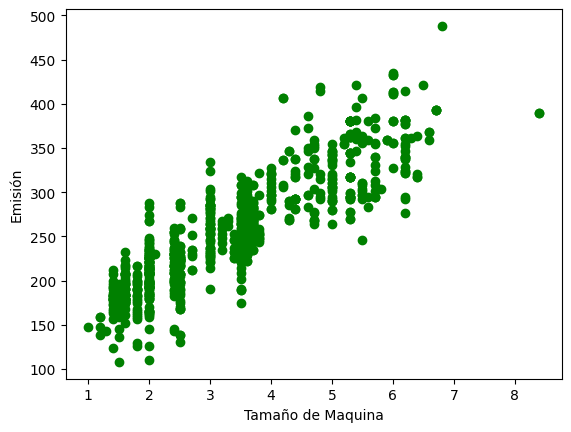

In [15]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='green')
plt.xlabel("Tamaño de Maquina")
plt.ylabel("Emisión")
plt.show()

### Entrenamos el modelo

In [16]:
# Creamos el arreglo de entrenamiento e instanciamos
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

#Ajustamos
regr.fit(train_x, train_y)

# Los coeficientes e intercepto de la ecuación lineal
print ('Coeficientes: ', regr.coef_)
print ('Intecepto: ',regr.intercept_)

Coeficientes:  [[38.77581176]]
Intecepto:  [125.99573685]


Observamos los parámetros de la regresión lineal. La pendiente o coeficientes es ~39.19 y el intercepto es ~125.08.

Text(0, 0.5, 'Emission')

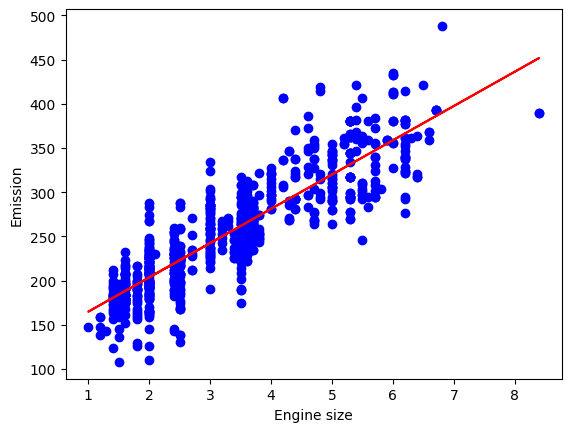

In [17]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")

### Evaluación

In [18]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_ = regr.predict(test_x)

#Imprimimos los errores
print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y))) # Error medio absoluto
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2)) # Error residual
print("R2-score: %.2f" % r2_score(test_y , test_y_) ) # R cuadrado

Mean absolute error: 23.20
Residual sum of squares (MSE): 999.18
R2-score: 0.74


### Probamos el modelo

In [19]:
# Párametros de la ecuacion lineal 
θ1=  39.19
θ0= 125.08

$$
CO2emissions= 125.08 + 39.19\cdot Enginesize
$$

In [20]:
#Calculamos la predicción para 2.4
ENGINESIZE= 2.4

emisionCO2= θ0 + θ1 *ENGINESIZE

print('La predicción de emision de C02 para 2.4 de ENGINESIZE es:', emisionCO2)

La predicción de emision de C02 para 2.4 de ENGINESIZE es: 219.136


## Regresión Lineal Multiple

Usaremos tres variables: 

x1: ENGINESIZE 

x2: CYLINDERS

x3: FUELCONSUMPTION_COMB

In [21]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

In [22]:
#Instanciamos la regresión lineal
from sklearn import linear_model
regr1 = linear_model.LinearRegression()

#Generamos los arreglos para cada varainles de entrenamiento
x = np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y = np.asanyarray(train[['CO2EMISSIONS']])

#Ajustamos el entrenamiento
regr1.fit (x, y)

# Imprime los parámetros
print ('Los parámetros son: ', regr1.coef_)
print ('Intecepto: ',regr1.intercept_)

Los parámetros son:  [[11.95276152  6.61053771  9.63457808]]
Intecepto:  [66.12956034]


θ0: 67.22 , θ1: 11.08,  θ2: 7.35,  θ3: 9.42

### Evaluación de la predicción

In [23]:
y_hat= regr1.predict(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
x = np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y = np.asanyarray(test[['CO2EMISSIONS']])
print("Suma residual de cuadrados: %.2f"
      % np.mean((y_hat - y) ** 2))

# Explained variance score: 1 is perfect prediction
print('Puntuación de varianza: %.2f' % regr1.score(x, y))

Suma residual de cuadrados: 610.07
Puntuación de varianza: 0.86
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


### Probamos el modelo

# Párametros de la ecuacion lineal 
θ0: 67.22 , θ1: 11.08,  θ2: 7.35,  θ3: 9.42

In [24]:
#Calculamos la predicción las siguientes caracteristicas del auto

#Valores de variables
ENGINESIZE= 2.4
CYLINDERS= 4
FUELCONSUMPTION_COMB= 9.2

# Valores de coeficientes e intecpto
θ0= 67.22
θ1= 11.08
θ2= 7.35
θ3= 9.42

#Calculamos la emisión de C=2 para una motor de 2.4
emisionCO2= θ0 + θ1 * ENGINESIZE + θ2 * CYLINDERS + θ3 * FUELCONSUMPTION_COMB

print('La predicción de emision de C02 para:')
print('-2.5 ENGINESIZE')
print('-4 CYLINDERS')
print('-9.2 FUELCONSUMPTION_COMB es:')
print('                             ', emisionCO2)

La predicción de emision de C02 para:
-2.5 ENGINESIZE
-4 CYLINDERS
-9.2 FUELCONSUMPTION_COMB es:
                              209.87599999999998


### 

### USAMOS ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY'

In [25]:
con_ch= df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY', 'CO2EMISSIONS']]
msk1 = np.random.rand(len(df)) < 0.8
train = con_ch[msk1]
test = con_ch[~msk1]

FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1

In [26]:
regr2 = linear_model.LinearRegression()
x = np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY']])
y = np.asanyarray(train[['CO2EMISSIONS']])
regr2.fit (x, y)
# The coefficients
print ('Coefficients: ', regr2.coef_)
print('Intercep:', regr2.intercept_)

y_hat1= regr2.predict(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY']])
x = np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY']])
y = np.asanyarray(test[['CO2EMISSIONS']])

print("Residual sum of squares: %.2f"
      % np.mean((y_hat1 - y) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr2.score(x, y))

Coefficients:  [[10.9920066   6.80738791  6.64002216  2.79223331]]
Intercep: [65.44152433]
Residual sum of squares: 498.65
Variance score: 0.87
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [27]:
#Calculamos la predicción las siguientes caracteristicas del auto

#Valores de variables
ENGINESIZE= 2.4
CYLINDERS= 4
FUELCONSUMPTION_CITY= 10.6
FUELCONSUMPTION_HWY= 7.5


# Valores de coeficientes e intecpto
θ0= 67.24
θ1= 11.58
θ2= 6.92
θ3= 5.86
θ3= 3.38

#Calculamos la emisión de C=2 para una motor de 2.4
emisionCO2= θ0 + θ1 * ENGINESIZE + θ2 * CYLINDERS + θ3 * FUELCONSUMPTION_CITY + θ3 * FUELCONSUMPTION_HWY

print('La predicción de emision de C02 para:')
print('-2.5 ENGINESIZE')
print('-4 CYLINDERS')
print('-10.6 FUELCONSUMPTION_CITY es:')
print('-7.5 FUELCONSUMPTION_HWY es:')
print('                             ', emisionCO2)

La predicción de emision de C02 para:
-2.5 ENGINESIZE
-4 CYLINDERS
-10.6 FUELCONSUMPTION_CITY es:
-7.5 FUELCONSUMPTION_HWY es:
                              183.89


### Regresión Polinomial

Con la variable ENGINESIZE

In [28]:
# Segmentamos los datos de entrenamiento y prueba
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

# Definimos el arreglo de entrenamiento
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

# Definimos el arreglo de prueba
test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])

# Transformamos a regresión polinomial
poly = PolynomialFeatures(degree=2)
train_x_poly = poly.fit_transform(train_x)
train_x_poly


array([[ 1.  ,  2.4 ,  5.76],
       [ 1.  ,  1.5 ,  2.25],
       [ 1.  ,  3.5 , 12.25],
       ...,
       [ 1.  ,  3.2 , 10.24],
       [ 1.  ,  3.  ,  9.  ],
       [ 1.  ,  3.2 , 10.24]])

In [30]:
# Calcular lo coeficientes de regresión
lml = linear_model.LinearRegression()
train_y_ = lml.fit(train_x_poly, train_y)

# Imprimos los coeficientes
print ('Coeficientes: ', lml.coef_)
print ('Intercepto: ',lml.intercept_)

Coeficientes:  [[ 0.         49.09447924 -1.36977445]]
Intercepto:  [109.74235774]


Text(0, 0.5, 'Emisión')

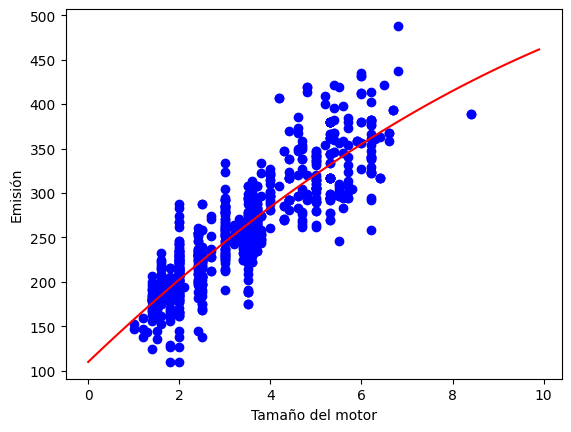

In [36]:
# Ploteamos el diagrama de dispresión
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
XX = np.arange(0.0, 10.0, 0.1)

# La función 
yy = lml.intercept_[0]+ lml.coef_[0][1]*XX+ lml.coef_[0][2]*np.power(XX, 2)

#Ploteamos la función
plt.plot(XX, yy, '-r' )
plt.xlabel("Tamaño del motor")
plt.ylabel("Emisión")

### Evaluamos

In [37]:
from sklearn.metrics import r2_score

test_x_poly = poly.transform(test_x)
test_y_ = lml.predict(test_x_poly)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y,test_y_ ) )

Mean absolute error: 23.46
Residual sum of squares (MSE): 968.43
R2-score: 0.76


Coeficientes:  [[ 0.         31.4253647   3.46995198 -0.39884123]]
Intercepto:  [128.56786668]
Mean absolute error: 23.42
Residual sum of squares (MSE): 961.26
R2-score: 0.76


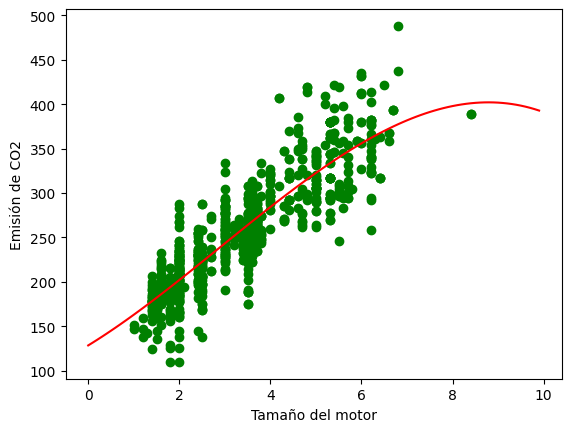

In [38]:
poly3 = PolynomialFeatures(degree=3)
train_x_poly3 = poly3.fit_transform(train_x)
lml3 = linear_model.LinearRegression()
train_y3_ = lml3.fit(train_x_poly3, train_y)

# Los coeficientes son:
print ('Coeficientes: ', lml3.coef_)
print ('Intercepto: ',lml3.intercept_)

#Plotemaos con un diagrama de dispersión
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='green')
XX = np.arange(0.0, 10.0, 0.1)
yy = lml3.intercept_[0]+ lml3.coef_[0][1]*XX + lml3.coef_[0][2]*np.power(XX, 2) + lml3.coef_[0][3]*np.power(XX, 3)

# Ploteamos la ecuacion
plt.plot(XX, yy, '-r' )
plt.xlabel("Tamaño del motor")
plt.ylabel("Emisión de CO2")
test_x_poly3 = poly3.transform(test_x)
test_y3_ = lml3.predict(test_x_poly3)

#Evaluamos
print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y3_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y3_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y,test_y3_ ) )

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=715d6333-1c46-4546-9019-c23e76afd8a9' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>